In [1]:


import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


In [2]:
data=pd.read_csv("loan_repayment_prediction.csv")
type(data)

pandas.core.frame.DataFrame

In [3]:
data.head(10)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:

data.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data.shape

(614, 13)

In [7]:
new_data=data.dropna()

In [8]:
new_data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [9]:
new_data.shape

(480, 13)

In [10]:
new_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
new_data.replace({ "Loan_Status":{'N':0,'Y':1}},inplace=True)

C:\Users\BIT\AppData\Local\Temp\ipykernel_16208\392759488.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data.replace({ "Loan_Status":{'N':0,'Y':1}},inplace=True)
C:\Users\BIT\AppData\Local\Temp\ipykernel_16208\392759488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.replace({ "Loan_Status":{'N':0,'Y':1}},inplace=True)


In [12]:
new_data["Credit_History"].value_counts()

Credit_History
1.0    410
0.0     70
Name: count, dtype: int64

In [13]:
new_data["Dependents"].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [14]:
new_data = new_data.replace("3+", 4)

new_data =new_data.replace("2",2)
new_data =new_data.replace("1",1)
new_data =new_data.replace("0",0)

C:\Users\BIT\AppData\Local\Temp\ipykernel_16208\1025135703.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data =new_data.replace("0",0)


In [15]:
new_data["Dependents"].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

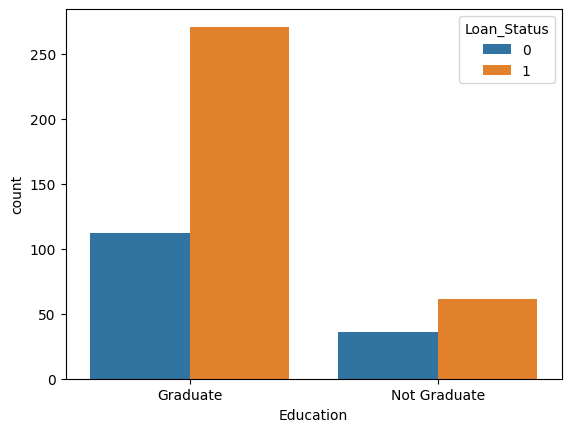

In [16]:
sns.countplot(x="Education",hue="Loan_Status",data=new_data)

<Axes: xlabel='LoanAmount', ylabel='Loan_Status'>

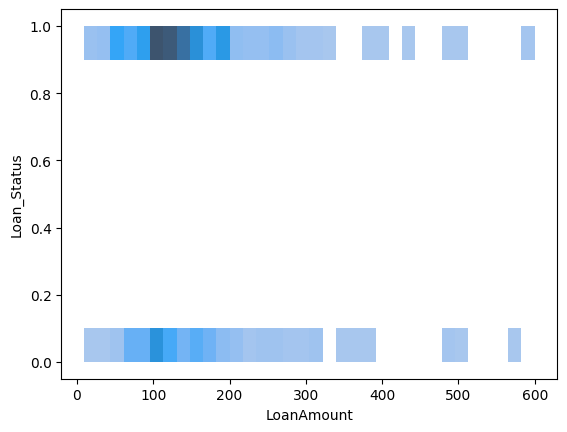

In [17]:
sns.histplot(x="LoanAmount", y="Loan_Status",  data=new_data)

<Axes: xlabel='Dependents', ylabel='Loan_Status'>

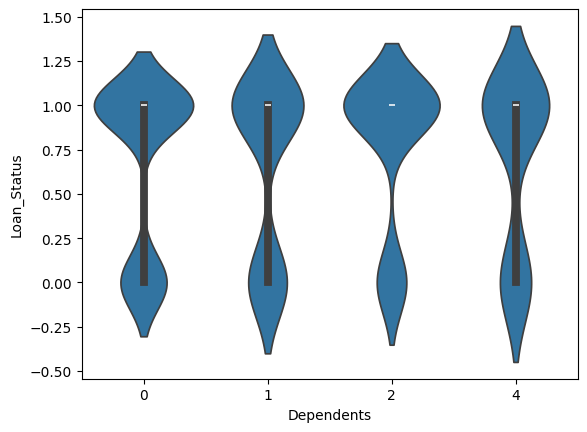

In [18]:
sns.violinplot(x="Dependents", y="Loan_Status",  data=new_data)

<Axes: xlabel='Dependents', ylabel='Count'>

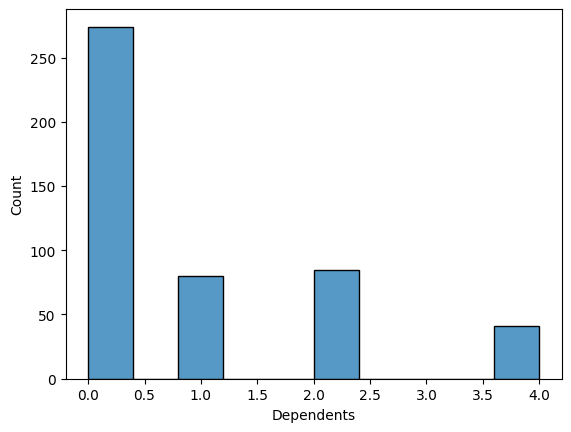

In [19]:
# For numerical or ordinal variable histogram (if Dependents is numeric)
sns.histplot(data=new_data, x='Dependents', bins=10)



In [20]:
new_data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

C:\Users\BIT\AppData\Local\Temp\ipykernel_16208\59272592.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},


In [21]:
new_data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1


In [22]:
X=new_data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=new_data['Loan_Status']

In [23]:
print(X)
print(Y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1           1          1              0             4583   
2         1        1           0          1              1             3000   
3         1        1           0          0              0             2583   
4         1        0           0          1              0             6000   
5         1        1           2          1              1             5417   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          1              0             2900   
610       1        1           4          1              0             4106   
611       1        1           1          1              0             8072   
612       1        1           2          1              0             7583   
613       0        0           0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [24]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y)

In [25]:
classifier = svm.SVC(kernel='linear')

In [26]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [27]:
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [28]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8194444444444444


In [29]:
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [30]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.7083333333333334


In [ ]:
gender = input("Enter your gender (Male/Female): ")
g = 1 if gender[0].upper() == 'M' else 0
married = input("Are you married? (Yes/No): ")
m = 1 if married[0].upper() == 'Y' else 0
self_employed = input("Are you self-employed? (Yes/No): ")
se = 1 if self_employed[0].upper() == 'Y' else 0
education = input("Are you a graduate? (Yes/No): ")
edu = 1 if education[0].upper() == 'Y' else 0
property_area = input("Property area (Rural/Semiurban/Urban): ").lower()
if property_area.startswith('r'):
    pa = 0
elif property_area.startswith('s'):
    pa = 1
else:
    pa = 2
Dependents = int(input("How many dependents do you have on you? "))
if Dependents == 0:
    d = 0
elif Dependents == 1:
    d = 1
elif Dependents == 2:
    d = 2
else:
    d=4
applicantincome = int(input("How much do you earn in a year? "))
coapplicantincome = int(input("How much does your coapplicant earn in a year? "))
loanamount = int(input("Enter the desired loan amount: "))
loan_amount_term = int(input("Enter the loan amount term (in days): "))
credit_history = int(input("Do you have a good credit history? (1 for Yes, 0 for No): "))

In [ ]:
running_input=[g,m,d,edu,se,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,pa]
running_output=[classifier.predict(running_input)]
print(running_output)